In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja
import matplotlib.pyplot as plt
import seaborn as sns

# podział danych na zbiory treningowe/walidacyjne/testowe
from sklearn.model_selection import train_test_split, GridSearchCV

# budowa Pipeline
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

# redukcja wymiarowości
from sklearn.decomposition import PCA

# model
from sklearn.linear_model import LogisticRegression

# ewaluacja
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

In [2]:
dataset = pd.read_csv('penguins.csv')
dataset

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [3]:
X = dataset.drop(['Species'], axis=1).copy()
y = dataset['Species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [4]:
num_features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

In [5]:
print('Surowy zbiór danych - zbiór treningowy:')
print(X_train[num_features].isnull().mean())
X_train_trasnformed = num_preparation.fit_transform(X_train[num_features])
X_train_trasnformed = pd.DataFrame(X_train_trasnformed, columns=num_features)
print('\nWyjście Pipeline - zbiór treningowy')
print(X_train_trasnformed[num_features].isnull().mean())

Surowy zbiór danych - zbiór treningowy:
CulmenLength     0.008333
CulmenDepth      0.008333
FlipperLength    0.008333
BodyMass         0.008333
dtype: float64

Wyjście Pipeline - zbiór treningowy
CulmenLength     0.0
CulmenDepth      0.0
FlipperLength    0.0
BodyMass         0.0
dtype: float64


In [6]:
print('Surowy zbiór danych - zbiór testowy:')
print(X_test[num_features].isnull().mean())
X_test_trasnformed = num_preparation.transform(X_test[num_features])
X_test_trasnformed = pd.DataFrame(X_test_trasnformed, columns=num_features)
print('\nWyjście Pipeline - zbiór testowy')
print(X_test_trasnformed[num_features].isnull().mean())

Surowy zbiór danych - zbiór testowy:
CulmenLength     0.0
CulmenDepth      0.0
FlipperLength    0.0
BodyMass         0.0
dtype: float64

Wyjście Pipeline - zbiór testowy
CulmenLength     0.0
CulmenDepth      0.0
FlipperLength    0.0
BodyMass         0.0
dtype: float64


In [7]:
num_features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']

# przygotowanie wartości numerycznych
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

# transformer = wartości numeryczne
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features)
])

penguins_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=10000))])

In [8]:
penguins_pipeline_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_preprocessing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer())]),
                                                  ['CulmenLength',
                                                   'CulmenDepth',
                                                   'FlipperLength',
                                                   'BodyMass'])])),
                ('model', LogisticRegression(max_iter=10000))])

In [10]:
predictions_lr = penguins_pipeline_v1.predict(X_test)

In [11]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      1.00      1.00        37
           2       1.00      0.95      0.98        21

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



In [12]:
print("PORÓWNANIE")
print("Classifiacation Report w przypadku modelu z poprzedniego modułu dla regresji logistycznej.")

PORÓWNANIE
Classifiacation Report w przypadku modelu z poprzedniego modułu dla regresji logistycznej.


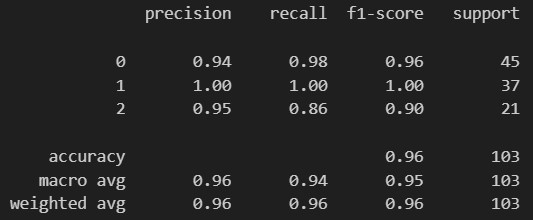

In [13]:
print("Classifiacation Report w przypadku modelu z poprzedniego modułu dla modelu K Najbliższych Sąsiadów.")

Classifiacation Report w przypadku modelu z poprzedniego modułu dla modelu K Najbliższych Sąsiadów.


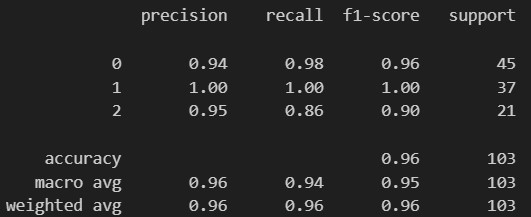

In [14]:
print("Classifiacation Report w przypadku modelu z poprzedniego modułu dla modelu SUPPORT VECTOR MACHINES.")

Classifiacation Report w przypadku modelu z poprzedniego modułu dla modelu SUPPORT VECTOR MACHINES.


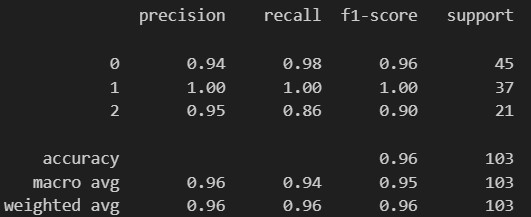

In [15]:
print("Jak można zauważyć najlepsze metryki uzyskał model opracowany z wykorzystaniem przygotowanego pipeline'u.")

Jak można zauważyć najlepsze metryki uzyskał model opracowany z wykorzystaniem przygotowanego pipeline'u.
